In [292]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [293]:
bankruptDF = pd.read_csv("C:\\Users\\willc\\Downloads\\Data for the graded assignment-20231015\\bankrupt.txt")

In [294]:
bankruptDF.shape

(6819, 96)

2. There are 6819 observations and 96 columns

In [295]:
bankruptDF.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder s Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [296]:
bankruptDF.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [297]:
max(bankruptDF.describe().std())

3542890503.7167788

3.Regarding the very high variance of this dataset (3542890503.7167788) for the implementation of some ml algorithms it is better to normalize the data

In [298]:
scaler = StandardScaler()
df = scaler.fit_transform(bankruptDF)

4. The target variable is 'Bankrupt ? A boolean variable which takes 1 if the company is banrupted and false otherwise,we can verify according to the debt ratio

In [299]:
bankruptDF[['Bankrupt?',' Debt ratio %']]

,Bankrupt?,Debt ratio %
0,1,0.207576
1,1,0.171176
2,1,0.207516
3,1,0.151465
4,1,0.106509
...,...,...
6814,0,0.124618
6815,0,0.099253
6816,0,0.038939
6817,0,0.086979


In [300]:
pd.value_counts(bankruptDF['Bankrupt?'])

0    6599
1     220
Name: Bankrupt?, dtype: int64

220 companies has been disrupted and 6599, only 3,3% of the companies are bankrupted so the data set is not balanced

In [301]:
percentage = 220/6599
percentage

0.03333838460372784

In [302]:
#4 Let's import the four datasets

In [313]:
x_train = pd.read_csv("C:\\Users\\willc\\Downloads\\Data for the graded assignment-20231015\\x_train.csv", index_col=0)
x_train.name = "x_train"
x_test = pd.read_csv("C:\\Users\\willc\\Downloads\\Data for the graded assignment-20231015\\x_test.csv",index_col=0)
x_test.name = "x_test"
y_train = pd.read_csv("C:\\Users\\willc\\Downloads\\Data for the graded assignment-20231015\\y_train.csv",index_col=0)
y_train.name = "y_train"
y_test = pd.read_csv("C:\\Users\\willc\\Downloads\\Data for the graded assignment-20231015\\y_test.csv",index_col=0)
y_test.name = "y_test"

In [314]:
print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

(1364, 12) (5455, 12) (1364, 1) (5455, 1)


Data set x_train : 5455 observations
x_test : 1364 observations
y_test : 1364 observations
y_train 5455 observations

In [315]:
datasets = [x_test, x_train, y_test, y_train]
i = 1
for dataset in datasets:
    i +=1
    for column in dataset.columns:
        print(x_test[column].mean, x_test[column].std)
        print("###############dataset###############"+str(i))


<bound method NDFrame._add_numeric_operations.<locals>.mean of 4929    0.481207
6424    0.501828
3807    0.517574
2011    0.521669
6728    0.492176
          ...   
6363    0.503681
348     0.480086
5397    0.515575
2355    0.473895
4555    0.552381
Name: ROAC, Length: 1364, dtype: float64> <bound method NDFrame._add_numeric_operations.<locals>.std of 4929    0.481207
6424    0.501828
3807    0.517574
2011    0.521669
6728    0.492176
          ...   
6363    0.503681
348     0.480086
5397    0.515575
2355    0.473895
4555    0.552381
Name: ROAC, Length: 1364, dtype: float64>
###############dataset###############2
<bound method NDFrame._add_numeric_operations.<locals>.mean of 4929    0.469418
6424    0.557894
3807    0.537505
2011    0.596162
6728    0.544320
          ...   
6363    0.572231
348     0.544374
5397    0.572885
2355    0.538378
4555    0.610554
Name: ROAA, Length: 1364, dtype: float64> <bound method NDFrame._add_numeric_operations.<locals>.std of 4929    0.469418
6424   

KeyError: 'Bankrupt'

In [316]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [317]:
bankrupt_train= pd.concat([x_train,y_train],axis=1, ignore_index=0)
x_train.count()

ROAC    5455
ROAA    5455
ROAB    5455
TRA     5455
TAGR    5455
DR      5455
WKTA    5455
CTA     5455
CLA     5455
CFOA    5455
CLCA    5455
NITA    5455
dtype: int64

In [318]:
formula = 'Bankrupt ~ ROAC + ROAA + ROAB + TRA + TAGR + DR + WKTA + CTA + CLA + CFOA + CLCA + NITA'

In [319]:
model = smf.glm(formula=formula, data=bankrupt_train, family=sm.families.Binomial())
logreg = model.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.79
Date:                Sun, 15 Oct 2023   Deviance:                       1027.6
Time:                        23:06:31   Pearson chi2:                 4.44e+06
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0644      3.655      1.659      0.0

DR: The p-value for DR is very small (p < 0.001), indicating that DR is statistically significant at the 0.05 significance level.
WKTA: The p-value for WKTA is 0.043, which is less than 0.05, making WKTA statistically significant.
CTA: The p-value for CTA is very small (p < 0.001), suggesting that CTA is statistically significant.
CLA: The p-value for CLA is 0.005, which is less than 0.05, making CLA statistically significant.

The absolute value of coeeficient of DR is the largest one in the model which means it has a very big weight into the prediction (20.5210)
Followed by CTA and CLA around 6.7 meaning they have equivalent weight in the prediction
and finally WKTA around 4

2.2.2

In [320]:
print(logreg.fittedvalues)

1524    0.018523
2819    0.011718
1957    0.003200
5020    0.000507
4443    0.010251
          ...   
4931    0.035072
3264    0.000354
1653    0.002176
2607    0.001122
2732    0.001647
Length: 5455, dtype: float64


In [321]:
yhat_logreg_probs = logreg.fittedvalues
yhat_logreg_probs

1524    0.018523
2819    0.011718
1957    0.003200
5020    0.000507
4443    0.010251
          ...   
4931    0.035072
3264    0.000354
1653    0.002176
2607    0.001122
2732    0.001647
Length: 5455, dtype: float64

In [322]:
yhat = [ 1 if x > 0.5 else 0 for x in yhat_logreg_probs]
print("Number of companies predicted by the model to bankrupted into the train data set", sum(yhat))

Number of companies predicted by the model to bankrupted into the train data set 46


In [323]:
from sklearn . metrics import confusion_matrix , classification_report
print("confusion matrix")
print(confusion_matrix(yhat,y_train))

confusion matrix
[[5266  143]
 [  15   31]]


C[0,0] = true positive -> Has bankrupted , C[0,1] false positive
C[1,0] = false negative -> Has bankrupted  , C[1,1] = true negative

In [324]:
print(classification_report(yhat,y_train,digits=3))

              precision    recall  f1-score   support

           0      0.997     0.974     0.985      5409
           1      0.178     0.674     0.282        46

    accuracy                          0.971      5455
   macro avg      0.588     0.824     0.634      5455
weighted avg      0.990     0.971     0.979      5455



Precision (for class 0): Precision measures the accuracy of the positive predictions for class 0. In this case, it's 0.997. This means that 99.7% of the instances predicted as non-bankrupt (class 0) were correctly classified.

Recall (for class 0): Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify actual class 0 instances. It's 0.974, indicating that 97.4% of actual non-bankrupt instances were correctly classified.



F1-Score (for class 0): The F1-score is the harmonic mean of precision and recall. It's a balanced metric that considers both false positives and false negatives. For class 0, the F1-score is 0.985, indicating a high balance between precision and recall.

Precision (for class 1): Precision for class 1 is 0.178, meaning that 17.8% of the instances predicted as bankrupt (class 1) were correctly classified.

Recall (for class 1): Recall for class 1 is 0.674, suggesting that 67.4% of actual bankrupt instances were correctly classified.

F1-Score (for class 1): The F1-score for class 1 is 0.282, reflecting the balance between precision and recall for class 1.

Accuracy: Overall model accuracy is 0.971, which means that 97.1% of all instances were correctly classified.

Macro Avg: This is the average of precision, recall, and F1-score for both classes. In your case, it's 0.588 for precision, 0.824 for recall, and 0.634 for F1-score.

Weighted Avg: This is a weighted average of precision, recall, and F1-score, taking into account the support (number of instances) for each class. In your case, it's 0.990 for precision, 0.971 for recall, and 0.979 for F1-score.

In summary, the model has high precision, recall, and F1-score for class 0, indicating that it performs well in classifying non-bankrupt instances. However, for class 1 (bankrupt instances), the model has lower precision, recall, and F1-score, indicating that it struggles to correctly classify bankrupt instances and often produces false negatives. This imbalance in performance may be due to the class distribution and suggests room for improvement in classifying bankrupt cases.

In [325]:
y_test_probs = logreg.predict(x_test)
yhat_test = [ 1 if x > 0.5 else 0 for x in y_test_probs]
print("Number of companies predicted by the model to bankrupted into the test data set", sum(yhat_test))

Number of companies predicted by the model to bankrupted into the test data set 19


In [327]:
print("confusion matrix")
print(confusion_matrix(yhat_test,y_test))

confusion matrix
[[1306   39]
 [  12    7]]


In [328]:
print(classification_report(yhat_test,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.971     0.981      1345
           1      0.152     0.368     0.215        19

    accuracy                          0.963      1364
   macro avg      0.572     0.670     0.598      1364
weighted avg      0.979     0.963     0.970      1364



2.2.3 The most relevants metrics for this type of problems are percentage of false negative because it affects banks, and percentage of true negative. So precision of class 1 and recall of class 1

In [192]:
#2.3 K-Nearest Neighbors

In [336]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
import numpy as np
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train,np.ravel(y_train))
knn=neigh.predict(x_test)

C:\Users\willc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [340]:
knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [355]:
avg_accuracy = []

In [356]:
for k in range(2, 20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    y_predict = neigh.fit(x_train, np.ravel(y_train)).predict(x_train)  # Make predictions
    balanced_acc = balanced_accuracy_score(y_train, y_predict)
    avg_accuracy.append(balanced_acc)

C:\Users\willc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\willc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [359]:
for k in range(len(avg_accuracy)) :
    print (k+1, avg_accuracy[k], sep=" : ")

1 : 0.5689655172413793
2 : 0.5998172803391904
3 : 0.5287356321839081
4 : 0.5343880795826287
5 : 0.5257673899274563
6 : 0.5314198373261769
7 : 0.5199255844526136
8 : 0.5199255844526136
9 : 0.514367816091954
10 : 0.514367816091954
11 : 0.5
12 : 0.5025895261042079
13 : 0.5027788841803298
14 : 0.5024948470661469
15 : 0.5
16 : 0.5
17 : 0.5
18 : 0.5


We have maximum for k=2

2.4 Linear discriminant analysis
I would choose k=2

In [364]:
k=2
neigh = KNeighborsClassifier(n_neighbors=k)
y_predict = neigh.fit(x_train, np.ravel(y_train)).predict(x_test)

C:\Users\willc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [366]:
print("confusion matrix")
print(confusion_matrix(y_predict,y_test))

confusion matrix
[[1313   45]
 [   5    1]]


In [367]:
print(classification_report(y_predict,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.996     0.967     0.981      1358
           1      0.022     0.167     0.038         6

    accuracy                          0.963      1364
   macro avg      0.509     0.567     0.510      1364
weighted avg      0.992     0.963     0.977      1364



Comparing to the previous model the number of false negative has largely decrease 12 to 5
and the number of true positive has increased a little 1306 -> 1313

In [392]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(x_train,np.ravel(y_train))
yhat_lda = model_lda.predict(x_test)

In [393]:
print(model_lda.priors_)

[0.96810266 0.03189734]


In [394]:
print(model_lda.means_)

[[5.07499371e-01 5.61487295e-01 5.56092411e-01 1.17719099e-01
  5.55001102e+09 1.11500340e-01 8.15420501e-01 1.25669967e-01
  8.96077591e-02 5.93879112e-01 3.06814657e-02 8.09838677e-01]
 [4.21282047e-01 4.58457712e-01 4.65005880e-01 3.33512513e-02
  4.96788333e+09 1.85968720e-01 7.49489244e-01 4.96204862e-02
  1.39421993e-01 5.58209193e-01 6.24193244e-02 7.39513902e-01]]


2.4.2 Confusion matrix

In [381]:
print(confusion_matrix(yhat_lda,y_test))

[[1299   31]
 [  19   15]]


In [383]:
print("sensitivity=" + str(1299/(1299+19)) , "specificity="+ str(15/(15+31)))

sensitivity=0.9855842185128983 specificity=0.32608695652173914


We have a high sensitivity of our linear model and a very low speificity. Which means that when the model predict a company to be bankrupted we have a very little confidence, but if a company if a company is likely to be bankrupted we are almost sure the model will classify it bankrupted

2.3 QDA

In [413]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(x_train,np.ravel(y_train))
yhat_qda = model_qda.predict(x_test)

In [414]:
print(model_qda.priors_)

[0.96810266 0.03189734]


2.4.3 Confusion matrix

In [415]:
print(confusion_matrix(yhat_qda,y_test))

[[1280   30]
 [  38   16]]


In [417]:
print("sensitivity=" + str(1280/(1299+38)) , "specificity="+ str(16/(16+30)))

sensitivity=0.9573672400897532 specificity=0.34782608695652173


2.5 ROC Curve function

In [418]:
lda_scores = lda.predict_proba(x_test)[:,1]

In [419]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lda_scores)
aire = auc(fpr, tpr)

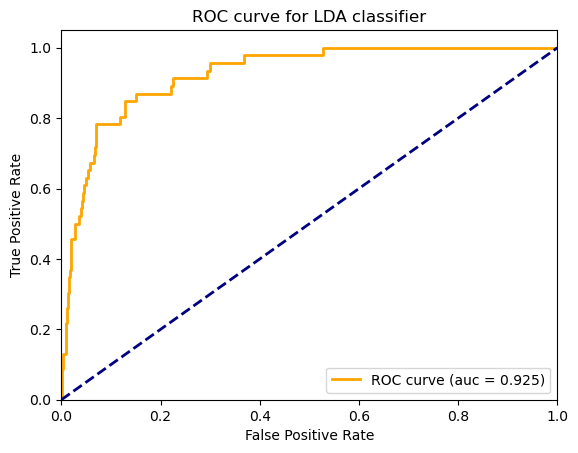

In [420]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA classifier')
plt.legend(loc="lower right")
plt.show()

In [421]:
qda_scores = qda.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lda_scores)
aire = auc(fpr, tpr)

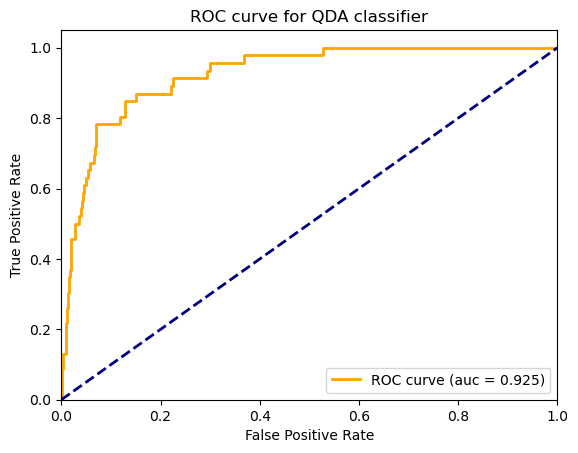

In [422]:
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (auc = %0.3f)' % aire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for QDA classifier')
plt.legend(loc="lower right")
plt.show()


C:\Users\willc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


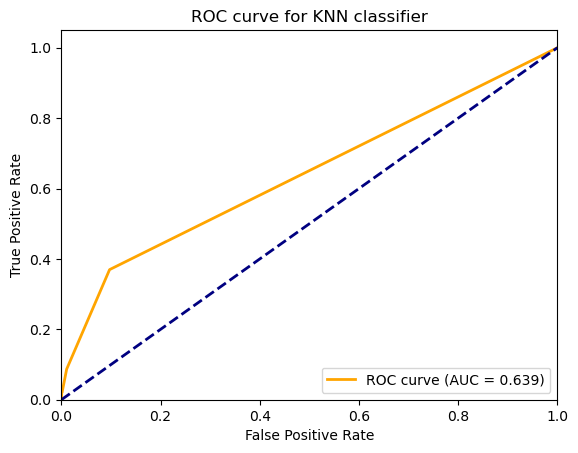

In [437]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_scores = knn.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN classifier')
plt.legend(loc="lower right")
plt.show()

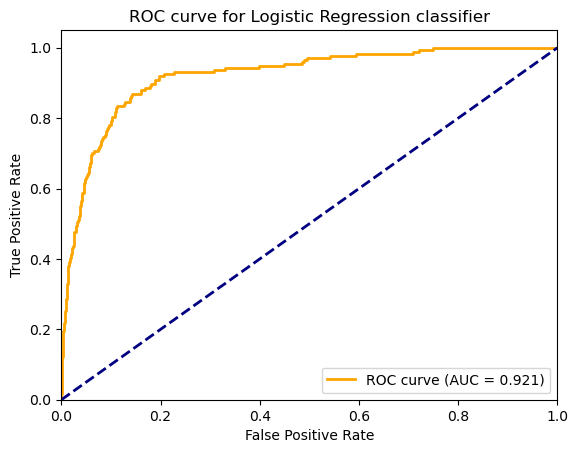

In [438]:
logreg_probs = logreg.predict()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(bankrupt_train['Bankrupt'], logreg_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression classifier')
plt.legend(loc="lower right")
plt.show()

According to the ROC Curve I will perform either QDA or LDA because they have the best AUC (Area under the curve)